#  این فایل جواب قسمت هشت و نه سوال است

In [28]:
import torch
import torch.nn as nn
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
torch.manual_seed(42)

# train function

Training with 1 layers
Epoch [1/100], Loss: 0.6913356184959412, Test Loss: 0.6705406904220581, Accuracy: 0.6428571428571429
Epoch [2/100], Loss: 0.691020667552948, Test Loss: 0.6702526211738586, Accuracy: 0.6428571428571429
Epoch [3/100], Loss: 0.6907060742378235, Test Loss: 0.6699636578559875, Accuracy: 0.6428571428571429
Epoch [4/100], Loss: 0.6903916001319885, Test Loss: 0.6696752905845642, Accuracy: 0.6428571428571429
Epoch [5/100], Loss: 0.6900777220726013, Test Loss: 0.6693865656852722, Accuracy: 0.6428571428571429
Epoch [6/100], Loss: 0.6897638440132141, Test Loss: 0.6690964698791504, Accuracy: 0.6428571428571429
Epoch [7/100], Loss: 0.6894500255584717, Test Loss: 0.6688067317008972, Accuracy: 0.6428571428571429
Epoch [8/100], Loss: 0.6891364455223083, Test Loss: 0.6685174107551575, Accuracy: 0.6666666666666666
Epoch [9/100], Loss: 0.6888233423233032, Test Loss: 0.6682273745536804, Accuracy: 0.6666666666666666
Epoch [10/100], Loss: 0.6885113716125488, Test Loss: 0.66793978214263

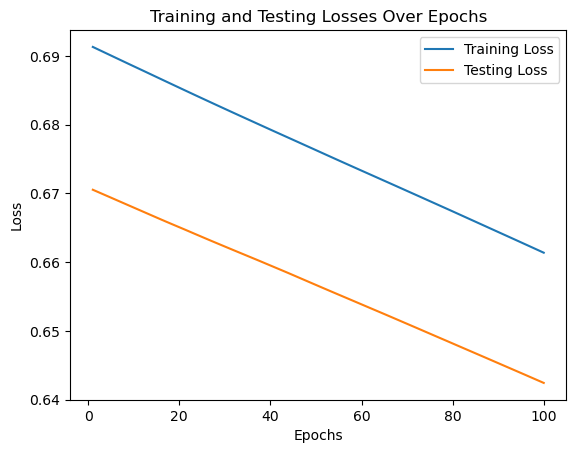

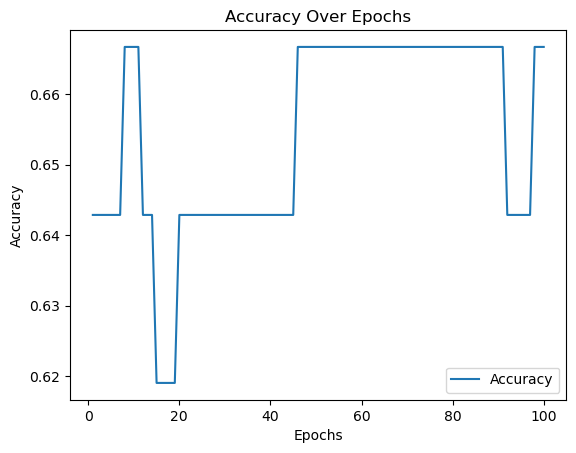

Training with 2 layers
Epoch [1/100], Loss: 0.7043821811676025, Test Loss: 0.702398955821991, Accuracy: 0.47619047619047616
Epoch [2/100], Loss: 0.7042729258537292, Test Loss: 0.7022605538368225, Accuracy: 0.47619047619047616
Epoch [3/100], Loss: 0.7041643857955933, Test Loss: 0.7021228671073914, Accuracy: 0.47619047619047616
Epoch [4/100], Loss: 0.7040563225746155, Test Loss: 0.7019856572151184, Accuracy: 0.5
Epoch [5/100], Loss: 0.7039485573768616, Test Loss: 0.7018490433692932, Accuracy: 0.5
Epoch [6/100], Loss: 0.7038412094116211, Test Loss: 0.7017129063606262, Accuracy: 0.5238095238095238
Epoch [7/100], Loss: 0.703734278678894, Test Loss: 0.7015774250030518, Accuracy: 0.5238095238095238
Epoch [8/100], Loss: 0.7036278247833252, Test Loss: 0.7014418840408325, Accuracy: 0.5238095238095238
Epoch [9/100], Loss: 0.7035213112831116, Test Loss: 0.7013065218925476, Accuracy: 0.5238095238095238
Epoch [10/100], Loss: 0.7034150958061218, Test Loss: 0.7011715769767761, Accuracy: 0.523809523809

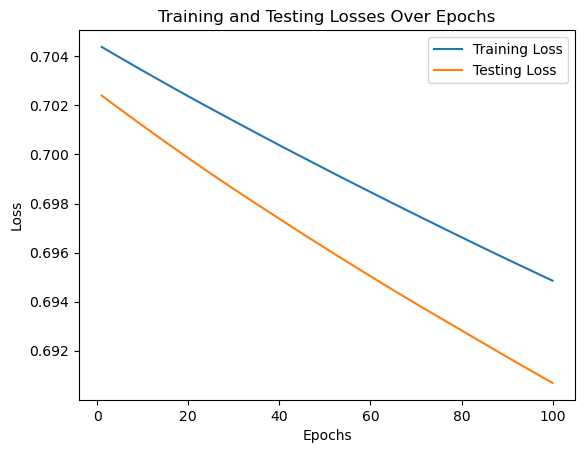

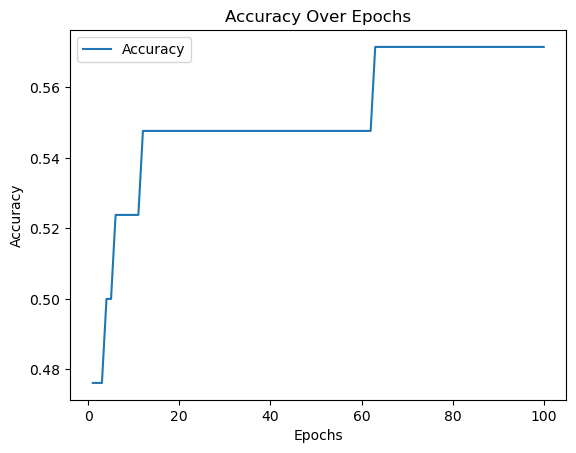

Training with 3 layers
Epoch [1/100], Loss: 0.699042558670044, Test Loss: 0.7188504338264465, Accuracy: 0.38095238095238093
Epoch [2/100], Loss: 0.698997974395752, Test Loss: 0.7187460660934448, Accuracy: 0.38095238095238093
Epoch [3/100], Loss: 0.6989535093307495, Test Loss: 0.7186419367790222, Accuracy: 0.38095238095238093
Epoch [4/100], Loss: 0.698909342288971, Test Loss: 0.7185384035110474, Accuracy: 0.38095238095238093
Epoch [5/100], Loss: 0.6988654136657715, Test Loss: 0.7184349894523621, Accuracy: 0.38095238095238093
Epoch [6/100], Loss: 0.698821485042572, Test Loss: 0.7183317542076111, Accuracy: 0.38095238095238093
Epoch [7/100], Loss: 0.6987777352333069, Test Loss: 0.7182286381721497, Accuracy: 0.38095238095238093
Epoch [8/100], Loss: 0.6987341046333313, Test Loss: 0.7181259393692017, Accuracy: 0.38095238095238093
Epoch [9/100], Loss: 0.6986907124519348, Test Loss: 0.718023419380188, Accuracy: 0.38095238095238093
Epoch [10/100], Loss: 0.6986473202705383, Test Loss: 0.717921137

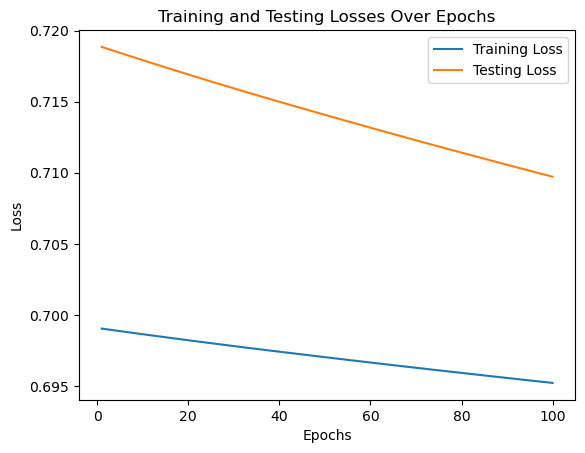

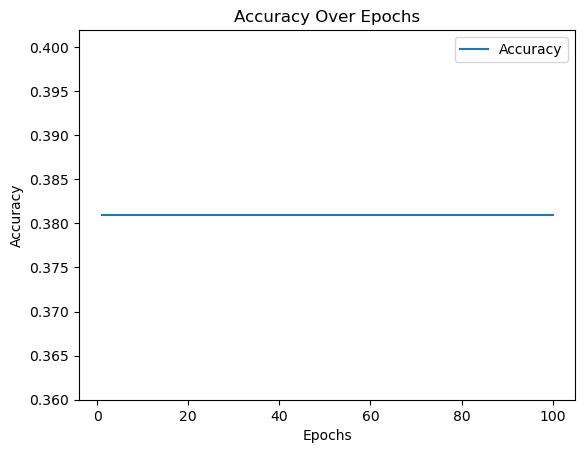

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Load data from the CSV file
file_path = "sonar.csv"
df = pd.read_csv(file_path, header=None)

# Separate features and labels
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Convert labels to numerical values
label_mapping = {'R': 0, 'M': 1}
y_numeric = y.map(label_mapping)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(MLP, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
        layers.append(nn.Linear(hidden_size, output_size))
        layers.append(nn.Softmax(dim=1))  # Softmax as activation in the last layer
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

# Train the model
def train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size,
                num_layers, optimizer, epochs=100):
    model = MLP(input_size, hidden_size, output_size, num_layers)
    criterion = nn.CrossEntropyLoss()
    optimizer = optimizer(model.parameters(), lr=0.01)

    # Lists to store training and testing losses and accuracies
    train_losses = []
    test_losses = []
    accuracies = []

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        outputs = model(torch.tensor(X_train_scaled, dtype=torch.float32))
        loss = criterion(outputs, torch.tensor(y_train.values, dtype=torch.long))
        loss.backward()
        optimizer.step()

        model.eval()
        with torch.no_grad():
            test_outputs = model(torch.tensor(X_test_scaled, dtype=torch.float32))
            test_loss = criterion(test_outputs, torch.tensor(y_test.values, dtype=torch.long))

        # Append losses to the lists
        train_losses.append(loss.item())
        test_losses.append(test_loss.item())

        # Calculate accuracy and append to the list
        predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
        accuracy = accuracy_score(y_test, predictions)
        accuracies.append(accuracy)

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}, Test Loss: {test_loss.item()}, Accuracy: {accuracy}')

    # Evaluate the model
    with torch.no_grad():
        predictions = torch.argmax(model(torch.tensor(X_test_scaled, dtype=torch.float32)), dim=1)
       
    # Display various metrics
    print(" Display various metrics") 
    print(f'Confusion Matrix:\n{confusion_matrix(y_test, predictions)}')
    print(f'Accuracy: {accuracy_score(y_test, predictions)}')

    # Plotting the training and testing losses
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), test_losses, label='Testing Loss')
    plt.title('Training and Testing Losses Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # Plotting the accuracy
    plt.plot(range(1, epochs + 1), accuracies, label='Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Specify model parameters
input_size = X_train.shape[1]
hidden_size = 30
output_size = 2  # Number of classes
num_layers_list = [1, 2, 3]  # Try different numbers of layers

# Specify optimizer
optimizer = torch.optim.SGD

# Train the model with different numbers of layers
for num_layers in num_layers_list:
    print(f"Training with {num_layers} layers")
    train_model(X_train, y_train, X_test, y_test, input_size, hidden_size, output_size,
                num_layers, optimizer)


In [31]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from scipy.stats import uniform

# Define the parameter distribution
param_dist = {
    'hidden_layer_sizes': [(30,), (50,), (30, 30), (50, 30)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': uniform(0.001, 0.1),
}

# Create an MLP classifier
mlp = MLPClassifier(max_iter=1000)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(mlp, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the model to the data
random_search.fit(X_train_scaled, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'activation': 'relu', 'alpha': 0.053477466025838916, 'hidden_layer_sizes': (30, 30)}
